<a href="https://colab.research.google.com/github/oriol-pomarol/codegeo_workshops/blob/main/6_over_under_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Over/under fitting – when is a model complex enough?

In this workshop, we will explore two important concepts in machine learning: underfitting and overfitting. In simple terms, **underfitting** happens when a model cannot capture the underlying structure of the data. This generally leads to poor performance both on training and unseen data. In contrast, **overfitting** happens when a model is too complex and learns noise instead of true patterns. This leads to excellent performance on training data but poor generalization to unseen data.

While developing a prediction model, our goal is to find a right balance between underfitting and overfitting. In this workshop, we will illustrate these concepts using two examples. First a noisy parabola, and then a real world example.


## 6.1 What is over/underfitting: a toy example

To understand underfitting and overfitting, we will use a simple **synthetic dataset**. We generate data based on a **true parabolic relationship** ($y = x^2$), but with added noise to simulate real-world uncertainty.  

In this example, we already know the true relationship between the data points, but in real-world problems, this is unknown. Therefore, we will fit the data using different regressors and evaluate their performance.

### Generating a synthetic dataset

First, we create the synthetic dataset based on a **parabolic relationship** including **normally distributed noise**. Let's start by loading the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Great, now we can generate a uniform set of 300 values between -3 and 4 using the `linspace()` function in numpy. This will be our predictor variable. Because we want to obtain a parabolic relationship, we square these values to find our predicted variable. Importantly, we add some normally distributed noise to the latter using the `random.normal()` function in numpy.

In [3]:
# Generate evenly spaced predictor values
np.random.seed(42)
X = np.linspace(-3, 4, 300).reshape(-1, 1)

# Generate a parabolic response and add normally distributed noise
y_true = X**2
y = y_true + np.random.normal(scale=4, size=X.shape)

Next, we will split the data into training and test sets, as we have learnt to do. The **training set** will be used to **fit** our models, while the **test set** will allow us to **evaluate** how well our models generalize to unseen data. For this, we randomly select 30% of the generated data points for testing. We also sort the data by the value of X in each set for easier visualization later on.

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sort the X_test by order
sorted_indices = np.argsort(X_test.flatten())
X_test = X_test[sorted_indices]
y_test = y_test[sorted_indices]

# Sort the X_train by order
sorted_indices = np.argsort(X_train.flatten())
X_train = X_train[sorted_indices]
y_train = y_train[sorted_indices]

Let's visualize the training and test datasets alongside the true parabolic relationship to better understand the concept. A balanced model should be able to generalize from the data, detecting the underlying relationship while ignoring the noise.

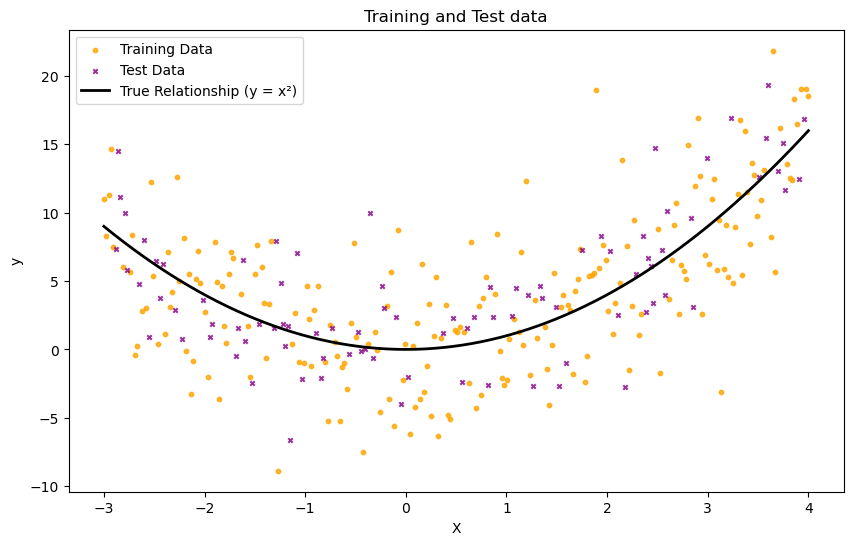

In [11]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data',alpha=0.8, s=10)

# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x',alpha=0.8, s=10)

# Plot
plt.plot(X,y_true,color="black",label = "True Relationship (y = x²)",alpha=1,linewidth=2)

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test data')
plt.legend()
plt.show()

### Fitting the models

We can choose from many regressors to find a balanced model; the selection largely depends on the nature of the data and the hypotheses we want to test. In this case, we’ve chosen three models to illustrate different approaches. 

- **Linear Regressor:** This model assumes a linear relationship between the input and output. This might not be the best idea, given that we already know the true relationship, but it helps illustrate the concept of **underfitting**.
  
- **Polynomial Regressor:** This model fits a higher-degree polynomial to the data, making it better suited for capturing more complex, non-linear relationships, though it may overfit when the degree is too high.
  
- **Decision Tree:** This model splits the data into regions based on feature values, offering flexibility to capture complex patterns but can easily overfit if not properly constrained.

These choices help us demonstrate how different models can perform on the same data and highlight the trade-offs between underfitting and overfitting.

Luckily, *sklearn* already contains a Linear Regression model and a Decision Tree Regressor, so we can use the same process as usual to fit them to the training data and use them to predict in both the train and test sets. There is no direct application of a polynomial regressor model, but we can easily transform the features by computing the higher order terms of the predictors to be able to use the Linear Regression for that (hence the pipeline approach).

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Fitting the models using the Train Set
# Linear Regression Model 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Polynomial Regression Model
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Decision tree
tree_reg = DecisionTreeRegressor(max_depth=None)
tree_reg.fit(X_train, y_train)

## Making predictions on Train and Test data

## Train data
# Linear Regression Model
y_pred_lin_train = lin_reg.predict(X_train)

# Polynomial Regression Model
y_pred_poly_train = poly_reg.predict(X_train)

# Decision Tree Model
y_pred_tree_train = tree_reg.predict(X_train)

## Test data
# Linear Regression Model
y_pred_lin_test = lin_reg.predict(X_test)

# Polynomial Regression Model
y_pred_poly_test = poly_reg.predict(X_test)

# Decision Tree Model
y_pred_tree_test = tree_reg.predict(X_test)


To illustrate an **overfitted**, **underfitted**, and **balanced model**, we modified certain parameters of the models. For example, for the polynomial regression model, we set the degree to 2 (which conveniently matches the true quadratic relationship). For the decision tree, we don't constrain the maximum depthof the trees, allowing it to make as many splits as it can from the training set. To understand better the functioning of Decision trees, you can check out the Understanding Random Forest workshop.

### Plotting model predictions

Now we can see how each of the previous models performed in both the training and test sets. What do you expect? Let's visualize the predictions using *matplotlib*.

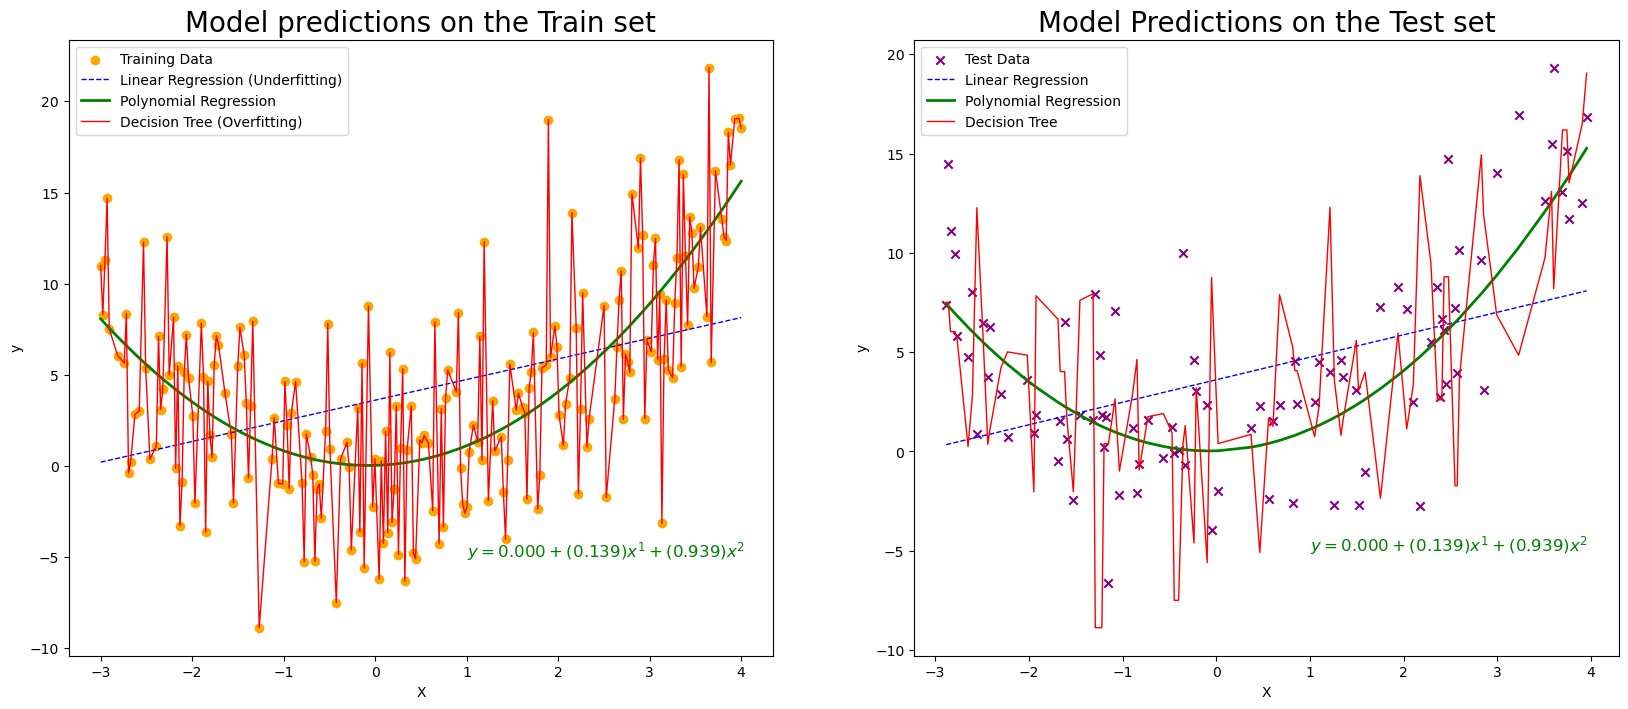

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data')

# Extract coefficients Polynomial Regression Model
poly_coef = poly_reg.named_steps['linearregression'].coef_
poly_formula_latex = f"$y = {poly_coef[0][0]:.3f} + ({poly_coef[0][1]:.3f})x^1 + ({poly_coef[0][2]:.3f})x^2$"

# Plot predictions
plt.plot(X_train, y_pred_lin_train, label='Linear Regression (Underfitting)', color='blue', linestyle='--', linewidth=1)
plt.plot(X_train, y_pred_poly_train, label='Polynomial Regression', color='green', linestyle='-', linewidth=2)
plt.plot(X_train, y_pred_tree_train, label='Decision Tree (Overfitting)', color='red', linestyle='-', linewidth=1)
plt.text(1, -5, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model predictions on the Train set', fontsize= 20)
plt.legend()
#plt.show()

plt.subplot(1,2,2)
# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x')

# Plot predictions for the continuous range (smooth lines)
plt.plot(X_test, y_pred_lin_test, label='Linear Regression', color='blue', linestyle='--', linewidth=1)
plt.plot(X_test, y_pred_poly_test, label='Polynomial Regression', color='green', linestyle='-', linewidth=2)
plt.plot(X_test, y_pred_tree_test, label='Decision Tree', color='red', linestyle='-', linewidth=1)

plt.text(1, -5, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions on the Test set',fontsize=20)
plt.legend()
plt.show()



In the plots above , we can observe the performance of each model.

- **Decision Tree (Overfitting)**: The decision tree fits the training data perfectly (left), learning every detail, including the noise. Because the noise is different for newly generated points, it struggles to generalize to the test data (right), where it performs poorly. 
  
- **Linear Regression (Underfitting)**: The linear regression model is too simple, unable to capture the quadratic relationship in the data. Therefore, it performs poorly on both the training and test data.
  
- **Polynomial Regression (Balanced)**: The polynomial regression model captures the underlying quadratic relationship well, so while it can't learn every pattern in the training data (left) because of the noise, it is able to generalize better to the test set (right).

### Detecting over/underfitting

We can also see if the model is overfitting or underfitting by evaluating the performance using a metric such as the **mean squared error** for all models for the train and test set.

In [19]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error for the Train Set
mse_lin_train = mean_squared_error(y_train, y_pred_lin_train)
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
mse_tree_train = mean_squared_error(y_train, y_pred_tree_train)

# Calculate the Mean Squared Error for the Test Set
mse_lin_test = mean_squared_error(y_test, y_pred_lin_test)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
mse_tree_test = mean_squared_error(y_test, y_pred_tree_test)

# DataFrame to display the results in a table format
mse_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial (degree=2)', 'Decision Tree'],
    'MSE (Train Set)': [mse_lin_train, mse_poly_train, mse_tree_train],
    'MSE (Test Set)': [mse_lin_test, mse_poly_test, mse_tree_test]
})

mse_table.set_index('Model').round(2)



,MSE (Train Set),MSE (Test Set)
Model,,
Linear Regression,29.02,24.08
Polynomial (degree=2),17.04,11.51
Decision Tree,0.00,36.58


The Mean Squared Error (MSE) values reinforce our observations from the plots. The decision tree has zero mean squared error on the training set, indicating a perfect fit, but its performance on the test set is poor due to overfitting. The linear regression model has a relatively high error on both the training and test sets, showing underfitting. The polynomial regression results in a good balance, with low errors on both sets, indicating good generalization.

## 6.2 Preventing over/underfitting: predicting water level

In the previous example, we knew the true underlying relationship, so it was easy to find a balance model. However, this is not the case with real-world problems. For the second part of the workshop, we are going to use a dataset that we have been using for previous workshops.

![Station](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Overzicht_stuwcomplex_met_schutsluis_-_Hagestein_-_20357221_-_RCE.jpg/800px-Overzicht_stuwcomplex_met_schutsluis_-_Hagestein_-_20357221_-_RCE.jpg?20241107202301)


In short, the task is to predict the water level at the Hagestein station in The Netherlands using a selection of five meteorological and hydrological variables: the discharge of the Rhine (QRHINE) and Meuse (QMEUSE) at the Dutch border, the water level of the North Sea (WLHv), precipitation (RH) and evaporation (EV24). For more details, check [Hauswirth et al. (2021)](https://doi.org/10.1016/j.advwatres.2021.104017).

### Loading the data

To start, we load the data, select the variables, and split the dataset into train and test sets. We also define a random_state to guarantee that we get the same results.

In [9]:
# Load the data
data_url = "https://raw.githubusercontent.com/Jignesh1594/CodeGeoworkshop_02_understanding_RF/master/data.csv"
data = pd.read_csv(data_url, delimiter=",", on_bad_lines='skip')

# Select input and output variables
input_data = data[['WLHv', 'RH', 'EV24', 'QMeuse', 'QRhine']]
output_data = data['value']

# Chronological Train-Test Split
train_size = int(0.80 * len(input_data))  # 80% for training/validation, 20% for testing

X_train, X_test = input_data.iloc[:train_size], input_data.iloc[train_size:]
y_train, y_test = output_data.iloc[:train_size], output_data.iloc[train_size:]

# Global variable
random_state = 27

As in the previous example, we will try a polynomial regressor and a Random Forest. In this exercise, we’ll modify certain parameters to find model configurations that avoid both overfitting and underfitting.

### Optimizing RF complexity

We will try using a Random Forest Regressor to model the data. To show how the hyperparameter selection can lead to underfitting and overfitting, we are going keep constant the number of estimators at 5 so each individual tree becomes more important and we are going to test a range of values for the maximum depth of the trees. We will first run a RF model without any constrains for the max_depth, then generate a set of max_depths to test between 2 and that number.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# First train a random forest with unconstrained depth to find natural maximum
n_estimators = 5
rf_unconstrained = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, random_state=random_state)
rf_unconstrained.fit(X_train, y_train)

# Get the maximum depth reached by any tree in the forest
max_depths = [estimator.get_depth() for estimator in rf_unconstrained.estimators_]
unconstrained_max_depth = max(max_depths)
print(f"Maximum depth reached in unconstrained trees: {unconstrained_max_depth}")

# Create a set of max_depth values from 2 to actual_max_depth
depth_values = np.unique(np.logspace(np.log10(2), np.log10(unconstrained_max_depth), 10, dtype=int))
print(f"Using depth values: {depth_values}")

# Dictionary to store models and predictions
rf_models = {}
train_predictions = {}
test_predictions = {}

# Fit models with different max_depth values
for depth in depth_values:
    # Create and train the model
    rf_models[depth] = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=random_state)
    rf_models[depth].fit(X_train, y_train)
    
    # Generate and store predictions
    train_predictions[depth] = rf_models[depth].predict(X_train)
    test_predictions[depth] = rf_models[depth].predict(X_test)

Maximum depth reached in unconstrained trees: 46
Using depth values: [ 2  4  5  8 11 16 22 32 46]


Now, we can see how these increasingly compex models did in the training compared to the test data. We take the MSE of their predictions in both sets and plot them using matplotlib.

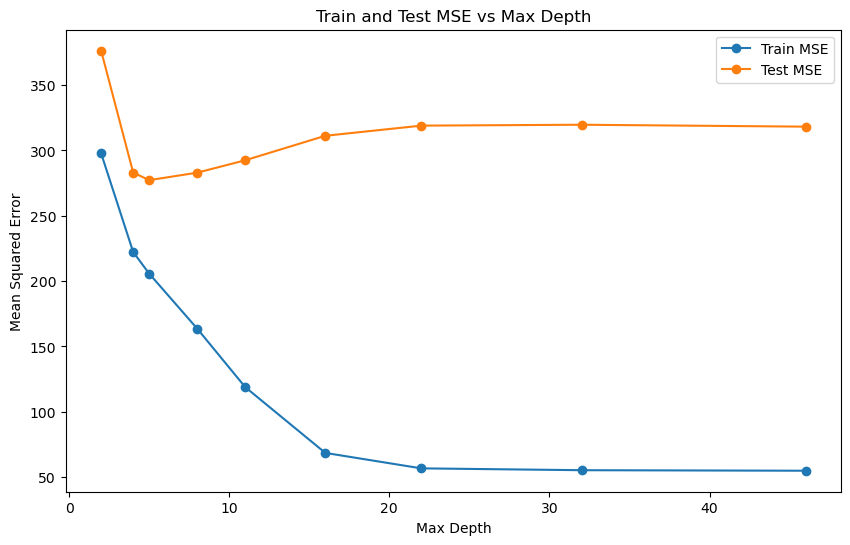

In [50]:
from sklearn.metrics import mean_squared_error

# Dictionary to store absolute residuals
train_mse = {}
test_mse = {}

# Calculate the MSE for each model
for depth in depth_values:
    train_mse[depth] = mean_squared_error(y_train, train_predictions[depth])
    test_mse[depth] = mean_squared_error(y_test, test_predictions[depth])

# Make a plot of the training and test MSE
plt.figure(figsize=(10, 6))
plt.plot(depth_values, list(train_mse.values()), label='Train MSE', marker='o')
plt.plot(depth_values, list(test_mse.values()), label='Test MSE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE vs Max Depth')
plt.legend()
plt.show()

Interesting! The MSE in the training set keeps decreasing as we make our model more complex, but on the test set that is a different story. We can see that at the beginning there is an improvement in model performance, but after a minimum value is reached the MSE starts increasing again. Any models to the left of this minimum are underfitting, and to the right they are overfitting.

### Alternative ways to prevent over/underfitting

In the previous subsection we have covered how **optimizing hyperparameters** related to the structural complexity of the model can help us obtain a balanced model. For this, selecting a validation split that is representative enough of the task that we want to achieve is key. Other examples are the number of trees and the minimum samples per leaf or split in Random Forest, or the number of units and layers and the addition of specialized layers for Neural Networks. To learn more about how to effectively tune hyperparameters check our previous workshop on the topic!

However, there are other ways to prevent overfitting and underfitting. See a couple examples in the table below.

| Problem | Technique | Explanation |
|---------|-----------|-------------|
| **Overfitting** | Increase (or augment) data | Provides more diverse examples to learn from, preventing the model from memorizing training data. |
|  | Add regularization | Adding terms to the loss function that constrain model parameters can reduce the effective complexity. |
| **Underfitting** | Extend training | Gives the model more iterations to learn complex patterns in the training data. |
|  | Feature engineering | Creates more informative features that better capture relevant patterns in the data. |


## 6.3 Detecting Over/underfitting: where to look at?

We have learnt a few different ways that help us get a balanced model and prevent overfitting and underfitting. However, even if we try our best sometimes the model can still suffer from these issues. How can we detect that this is the case for one of our models? To analyse that, we will select three models from the previous section: an **underfitting** model that has a max_depth of 2, a **balanced** model corresponding to the optimal depth found before, and an **overfitting** model with the unconstrained depth.

### Effect in model predictions

Let's see effect of the three models on the predictions that they make. Let's plot a subset of the training and test data for the three selected models.

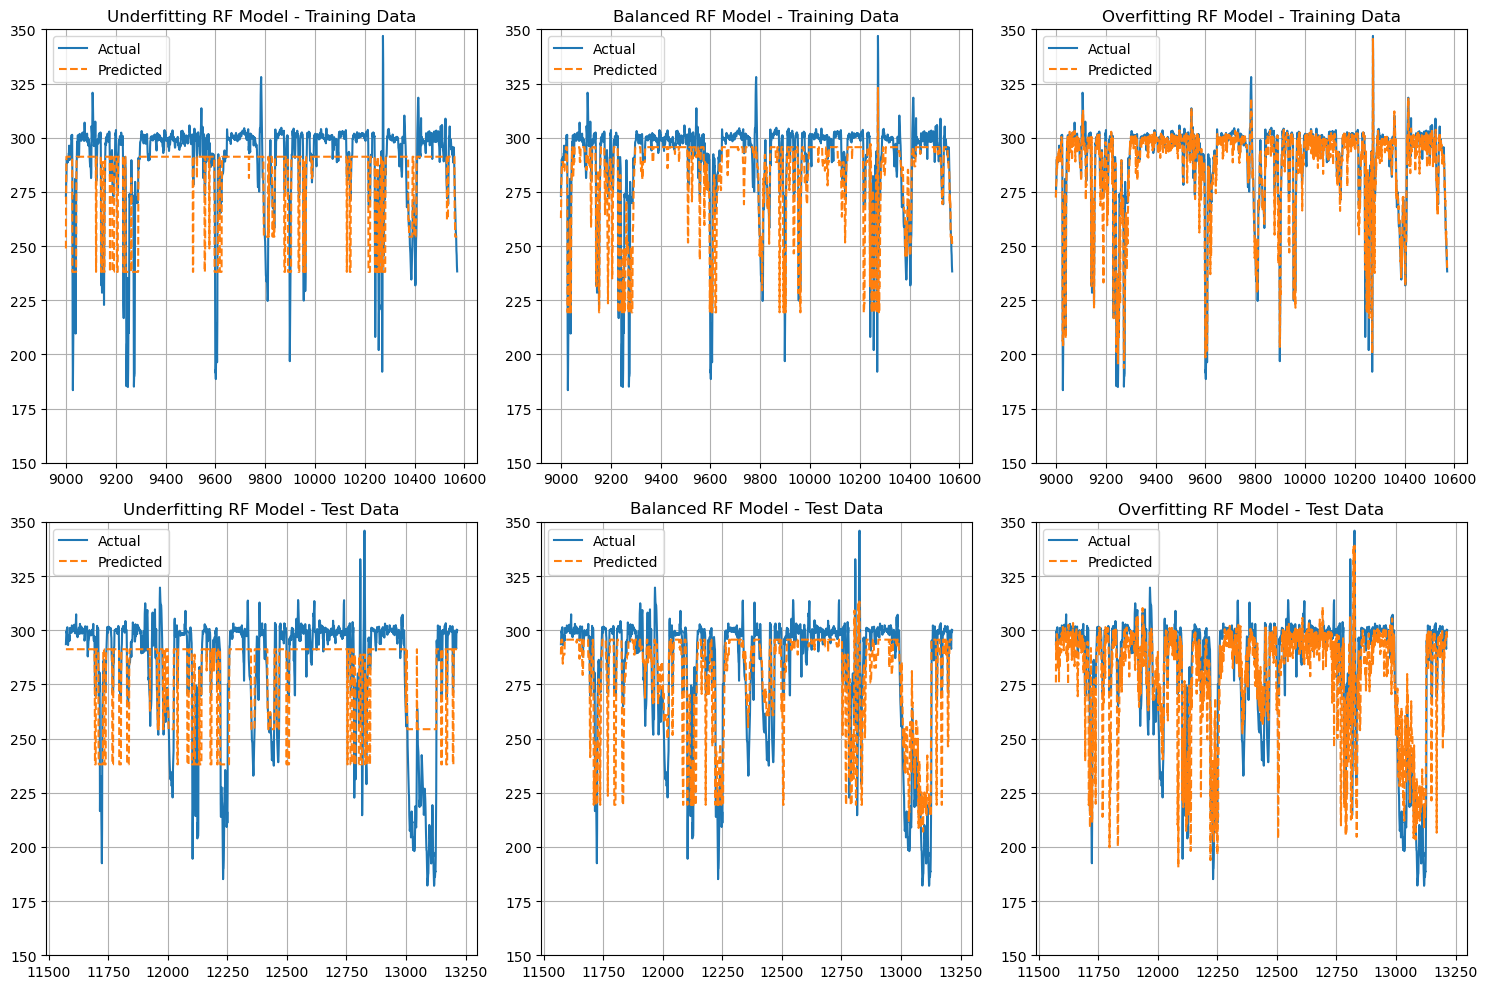

In [63]:
# Create figure for residual plots
plt.figure(figsize=(15, 10))

# Define model types and datasets
model_types = [
    (underfit_depth, "Underfitting"),
    (balanced_depth, "Balanced"),
    (overfit_depth, "Overfitting")
]

datasets = [
    (y_train, train_predictions, 9000, "Training"),
    (y_test, test_predictions, 1000, "Test")
]

# Loop through each model type and dataset
for col, (depth, model_name) in enumerate(model_types, 1):
    for row, (y_data, predictions, start_idx, data_type) in enumerate(datasets):
        # Calculate subplot position (1-based indexing)
        position = row * 3 + col
        
        plt.subplot(2, 3, position)
        plt.plot(y_data.index[start_idx:], y_data.iloc[start_idx:], label='Actual')
        plt.plot(y_data.index[start_idx:], predictions[depth][start_idx:], label='Predicted', linestyle='dashed')
        plt.title(f"{model_name} RF Model - {data_type} Data")
        plt.ylim(150, 350)
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

From that we can try to identify what patterns define each type of model.

- Underfitting Model: The predicted values fail to closely follow the actual values. Predictions seem too simplistic, likely suffering from high bias.

- Balanced Model: The predicted values align more closely with the actual values compared to the underfitting model. Indicates a good balance between bias and variance.

- Overfitting Model: The training data predictions fit almost perfectly to the actual values. However, the test data predictions show more deviation, suggesting high variance and poor generalization.


### Distribution of residuals

To better understand the performance of our models, we will specifically analyse the absolute error between the actual and predicted values for the three models.Then, the distribution of these errors can give us more insights on what is happening.

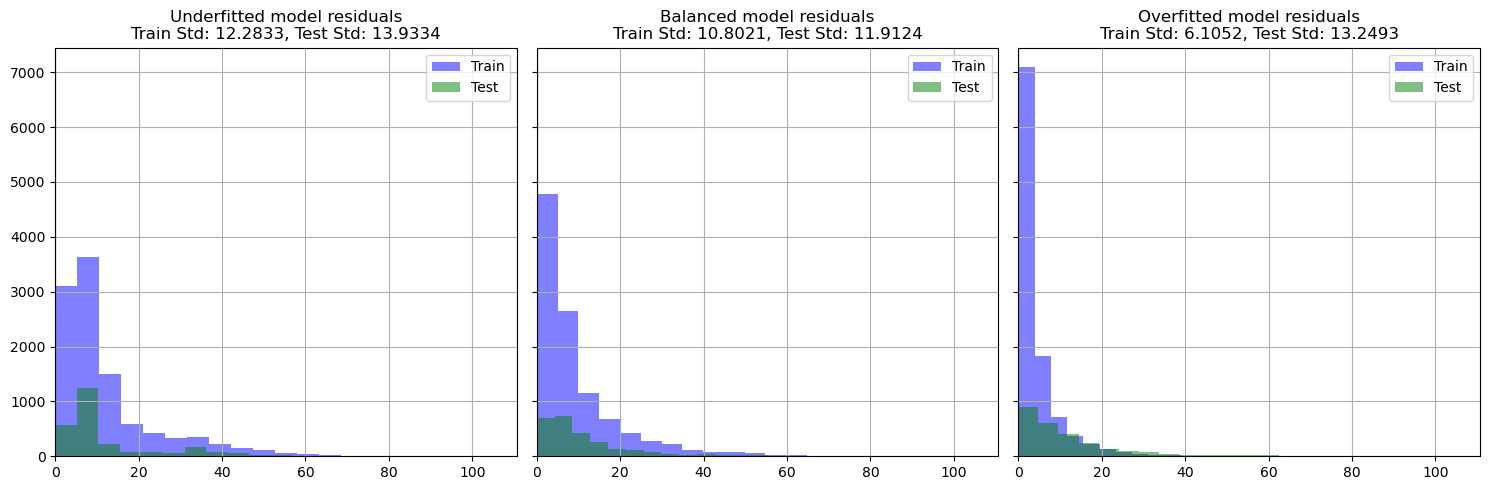

In [65]:
# Define the depths of the RF models that we will analyse
overfit_depth = unconstrained_max_depth
underfit_depth = 2
balanced_depth = min(test_mse, key=test_mse.get)

# Define model types
model_types = [
    (underfit_depth, "Underfitted"),
    (balanced_depth, "Balanced"),
    (overfit_depth, "Overfitted"),
]

# Plot the distribution of the residuals
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for (depth, model_name), ax in zip(model_types, axes):
    residuals_train = np.abs(train_predictions[depth] - y_train)
    residuals_test = np.abs(test_predictions[depth] - y_test)
    
    ax.hist(residuals_train, bins=20, alpha=0.5, color='blue', label='Train')
    ax.hist(residuals_test, bins=20, alpha=0.5, color='green', label='Test')
    
    title = f'{model_name} model residuals\nTrain Std: {np.std(residuals_train):.4f}, Test Std: {np.std(residuals_test):.4f}'
    ax.set_title(title)
    ax.axvline(x=0, color='black')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0)
    
plt.tight_layout()
plt.show()

Both the balanced and underfitted models show similar behaviour. The training standard deviations are much higher, because the model will not try to reach to every single point in the data, but the results in the test set are similar than those at the training set. The main difference is that the balanced model achieves lower values for both.

For the overfitted model, the spread of the values is larger in the test set than in the training one. This happens because the model is fitting all the noise in the training data, hence any outliers are also integrated, reducing any large errors that they may produce. In the test set, this relationships don't hold true, so the standard deviation is a lot higher.

## 6.4 Final remarks

By now you should have a pretty good idea of what overfitting and underfitting are, how to detect when your model is affected by them, and how to prevent them to obtain a model that strikes a good balance between variance and bias. Now it is time to test if you can use that knowledge in practice!

The exercise this time is to tune the complexity of a neural network model by changing its size, until you can find a model that looks balanced. You can use the water depth data to follow the steps below.

In [ ]:
# Create an MLPRegressor with a set number of hiddeen_layer_sizes 

# Check the training and test MSE

# Plot the predictions and residuals

# Decide if the model is underfitting, overfitting, or balanced

# Repeat the process with different number of hidden units